In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies (1).csv
Saving ratings.csv to ratings (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
movies_df = pd.read_csv(io.BytesIO(uploaded['movies.csv']), usecols = ["movieId" , "title"] , dtype = {"movieId" : "int32" })
rating_df = pd.read_csv(io.BytesIO(uploaded['ratings.csv']), usecols = ["userId" , "movieId" , "rating"] , dtype = {"userID" : "int32" , "movieID" : "int32" ,  "rating" : "float32"})

In [ ]:
movies_df.head(2)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)


In [ ]:
rating_df.head(2)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0


# EDA on "Movies" dataframe 

In [ ]:
movies_df.head(2)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)


In [ ]:
print("Total number of (Rows and Columns) in our dataframe : {} ".format(movies_df.shape))

Total number of (Rows and Columns) in our dataframe : (9742, 2) 


In [ ]:
print("Number of Unique Movies : {}".format(movies_df["movieId"].nunique()))

Number of Unique Movies : 9742


In [ ]:
print("Number of Unique movies : {}".format(movies_df["title"].nunique()))

Number of Unique movies : 9737


In [ ]:
movies_df["title"].value_counts()

War of the Worlds (2005)                  2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
Emma (1996)                               2
                                         ..
Temptress Moon (Feng Yue) (1996)          1
Fun (1994)                                1
The Green Prince (2014)                   1
Deep Red (Profondo rosso) (1975)          1
Take the Money and Run (1969)             1
Name: title, Length: 9737, dtype: int64

# EDA on "Ratings" dataframe

In [ ]:
rating_df.head(2)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0


In [ ]:
print("Total number of (Rows and Columns) in our dataframe : {} ".format(rating_df.shape))

Total number of (Rows and Columns) in our dataframe : (100836, 3) 


In [ ]:
print("Number of Unique users : {}".format(rating_df["userId"].nunique()))

Number of Unique users : 610


In [ ]:
print("Number of Unique Movies : {}".format(rating_df["movieId"].nunique()))

Number of Unique Movies : 9724


In [ ]:
print("Total count of ratings for each acceptable value : \n{}".format(rating_df["rating"].value_counts(dropna = False, normalize = True)))

Total count of ratings for each acceptable value : 
4.0    0.265957
3.0    0.198808
5.0    0.131015
3.5    0.130271
4.5    0.084801
2.0    0.074884
2.5    0.055040
1.0    0.027877
1.5    0.017762
0.5    0.013586
Name: rating, dtype: float64


(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ],
       dtype=float32),
 <a list of 10 Patch objects>)

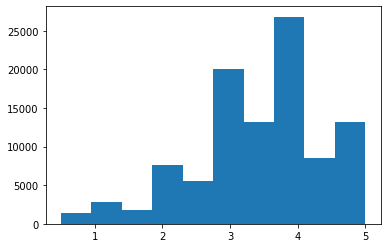

In [ ]:
plt.hist(rating_df["rating"] )

# Merging movies and ratings dataframe

In [ ]:
Final_df = pd.merge(movies_df , rating_df ,  on = "movieId")

In [ ]:
print(Final_df.head(20))

# droping rows with null values 

In [ ]:
Final_df.isnull().sum()

movieId    0
title      0
userId     0
rating     0
dtype: int64

In [ ]:
Final_df.dropna(axis=0, subset= ["title"] , inplace= True)

# making a movie rate count 

In [ ]:
Final_df.head(2)

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0


In [ ]:
a = Final_df.groupby(by = ["title"])["rating"].count().reset_index().rename(columns = {"rating" : "number_of_times_rated"})[["title" , "number_of_times_rated"]]
print(a.head(5))

                                     title  number_of_times_rated
0                               '71 (2014)                      1
1  'Hellboy': The Seeds of Creation (2004)                      1
2                   'Round Midnight (1986)                      2
3                      'Salem's Lot (2004)                      1
4                'Til There Was You (1997)                      2


In [ ]:
ratings_with_number_of_times = Final_df.merge( a, left_on = "title" , right_on = "title" , how = "left")
ratings_with_number_of_times.head(2)

,movieId,title,userId,rating,number_of_times_rated
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215


In [ ]:
a = ratings_with_number_of_times["number_of_times_rated"].value_counts(ascending = True , normalize = True)

98     0.000972
111    0.001101
113    0.001121
124    0.001230
128    0.001269
         ...   
7      0.019299
4      0.020985
3      0.023801
2      0.025745
1      0.034125
Name: number_of_times_rated, Length: 177, dtype: float64

(array([10553.,  5775.,  4868.,  5791.,  3698.,  3490.,  3060.,  4127.,
         2083.,  2654.,  3177.,  2810.,  2819.,  2609.,  2610.,  1776.,
         1649.,  2627.,  1605.,  1489.,  1357.,  1350.,  1278.,  1011.,
         1052.,  1268.,   966.,  1370.,   945.,   781.,  1111.,   935.,
         1294.,   775.,   458.,   586.,   966.,   620.,   380.,  1046.,
          667.,   273.,   984.,   719.,   292.,   298.,     0.,   157.,
          320.,   326.,   165.,   682.,   172.,   355.,   360.,   183.,
          185.,   755.,   192.,   196.,   599.,   813.,     0.,     0.,
          211.,   215.,   438.,   224.,     0.,     0.,     0.,   237.,
          238.,     0.,     0.,     0.,   251.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,   557.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,   307.,     0.,     0.,
          317.,     0.,     0.,   329.]),
 array([  1.  ,   4.28,   7.56,  10.84,  14.12,  17.4 ,  20.68,  23.96,
         27.24,  30.52

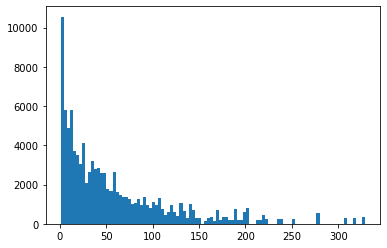

In [ ]:
plt.hist(ratings_with_number_of_times["number_of_times_rated"] , bins = 100)

In [ ]:
popularity_count = 50
popular_movies = ratings_with_number_of_times.query('number_of_times_rated >= @popularity_count')
popular_movies.head(2)


,movieId,title,userId,rating,number_of_times_rated
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215


In [ ]:
popular_movies.shape

(41362, 5)

In [ ]:
popular_movies["title"].nunique()

450

In [ ]:
popular_movies["userId"].nunique()

606

# creating pivot table 

In [ ]:
movies = popular_movies.pivot_table(index = "title" , columns = "userId" , values = "rating").fillna(0)
movies.head(3 )

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,570,571,572,573,574,575,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,4.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5


converting pivot matrix into array matrix

In [ ]:
from scipy.sparse import csr_matrix
movies_final = csr_matrix(movies)

In [ ]:
movies_final.shape

(450, 606)

# Model building

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric = "cosine" , algorithm = "brute") #we are just calling function here 
knn.fit(movies_final)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)


here we have 450 rows and 606 columns 
we are trying to pick a row randomly from the 450 available rows 





*   remeber we are not doing this on csr matrix but we are doing this on pivot table





In [ ]:
query_term = np.random.choice(movies_final.shape[0])
distances , indices = knn.kneighbors(movies.iloc[query_term,:].values.reshape(1 , -1) , n_neighbors = 6)
print("Query term : {0}\nDistances : {1}\nFlattend distances : {2}\nIndices : {3}".format(query_term , distances , distances.flatten() , indices))

Query term : 332
Distances : [[0.         0.45818096 0.47226954 0.5099523  0.5190644  0.52233326]]
Flattend distances : [0.         0.45818096 0.47226954 0.5099523  0.5190644  0.52233326]
Indices : [[332 243 375 392 216 330]]


In [ ]:
for i in range(0 , len(distances.flatten())):
  if i == 0 :
    print("recommendation for {0} : \n".format(movies.index[query_term]))
  else :
    print("{0} : {1} , with distance of {2}".format(i , movies.index[indices.flatten()[i]] , distances.flatten()[i]))

recommendation for Romancing the Stone (1984) : 

1 : Lethal Weapon (1987) , with distance of 0.4581809639930725
2 : Splash (1984) , with distance of 0.47226953506469727
3 : Superman (1978) , with distance of 0.5099523067474365
4 : Indiana Jones and the Temple of Doom (1984) , with distance of 0.5190644264221191
5 : Rocky (1976) , with distance of 0.5223332643508911
